In [1]:
# to auto reload the modified module
% load_ext autoreload
% autoreload 2

In [2]:
import tensorflow as tf
import numpy as np
import random
import os
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

from utils import *
from data import MnistTF
from models import *

/home/deep3072/anaconda2/envs/tu36/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


In [3]:
# session settings
session = create_session(gpu_id='0')
# seed settings
set_rand_seed(0)

In [4]:
try_reg2 = False
if try_reg2:
#         X_data = np.random.random((6000))[:, np.newaxis]*100
#         noise = np.random.normal(0, 0.05, X_data.shape).astype(np.float32)*0
#         y_data = X_data*2 + 1 + noise
    X_data = np.linspace(-10,10,5000, dtype=np.float32)[:, np.newaxis]
    np.random.shuffle(X_data)
    noise = np.random.normal(0, 10, X_data.shape).astype(np.float32)
    y_data = np.square(X_data) - 0.5 + noise
    print('X_data',X_data.shape,'\n',X_data[:5])
    print('y_data',y_data.shape,'\n',y_data[:5])
    
    X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.2)
    X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25)
    
    input_dims = X_train.shape[1]
    col_0 = SoftenedNN(
        input_dims=input_dims
        , output_dims=1
        , session=session
        , dtype_X=tf.float32, dtype_y=tf.float32
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=256,activation_fn=tf.nn.relu)
    )
    col_0.add_layer(
        FC(inputs=col_0.h[-1],out_dims=1,activation_fn=None)
    )
    col_0.compile_nn(
#         loss=tf.reduce_mean(tf.reduce_sum(tf.square(col_0.ys - col_0.prediction),reduction_indices=[1]))
        loss=tf.losses.mean_squared_error(col_0.ys,col_0.prediction)
        ,opt=tf.train.AdamOptimizer(learning_rate=1e-3)
#         ,opt=tf.train.GradientDescentOptimizer(learning_rate=1e-1)
#         ,mectrics=[]
    )
    col_0.train(
        X=X_train
        , y=y_train
#         , val_set=[X_val,y_val]
        , batch_size=32
        , n_epochs=200
        , display_steps=100
    )

In [5]:
if try_reg2:
    col_0.plt_loss()
    col_0.plt_metrics()
    test_metric = col_0.get_metrics(X_test, y_test)
    print(test_metric)

In [34]:
try_cls2 = True
if try_cls2:
    mnist = MnistTF()
    X_train, y_train = mnist.get_train_data()
    X_val, y_val = mnist.get_validation_data()
    X_test, y_test = mnist.get_test_data()
    print_obj(X_train, 'X_train')
    print_obj(y_train, 'y_train')
    print_obj(X_val, 'X_val')
    print_obj(y_val, 'y_val')
    print_obj(X_test, 'X_test')
    print_obj(y_test, 'y_test')
    input_dims = X_train.shape[1]
    output_dims = y_train.shape[1]
    print_obj(input_dims, 'input_dims')
    print_obj(output_dims, 'output_dims')


Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz
X_train <class 'numpy.ndarray'> (55000, 784)
y_train <class 'numpy.ndarray'> (55000, 10)
X_val <class 'numpy.ndarray'> (5000, 784)
y_val <class 'numpy.ndarray'> (5000, 10)
X_test <class 'numpy.ndarray'> (10000, 784)
y_test <class 'numpy.ndarray'> (10000, 10)
input_dims <class 'int'> 784
output_dims <class 'int'> 10


In [7]:
if try_cls2:
    teacher = build_big_model(input_dims, output_dims, session)
    teacher.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=10
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.8693588 val_loss= 3.8426836 , acc = 0.1875 val acc = 0.1384 
Epoch 1 , step 100 , loss= 1.1140857 val_loss= 0.5118944 , acc = 0.6875 val acc = 0.841 
Epoch 1 , step 200 , loss= 0.44745806 val_loss= 0.40540257 , acc = 0.9375 val acc = 0.8704 
Epoch 1 , step 300 , loss= 0.5846293 val_loss= 0.32664824 , acc = 0.90625 val acc = 0.8966 
Epoch 1 , step 400 , loss= 0.10503053 val_loss= 0.31534806 , acc = 0.9375 val acc = 0.9032 
Epoch 1 , step 500 , loss= 0.37776664 val_loss= 0.2547051 , acc = 0.90625 val acc = 0.9214 
Epoch 1 , step 600 , loss= 0.13548735 val_loss= 0.24972929 , acc = 0.96875 val acc = 0.9268 
Epoch 1 , step 700 , loss= 0.10655293 val_loss= 0.22617793 , acc = 1.0 val acc = 0.9314 
Epoch 1 , step 800 , loss= 0.37590706 val_loss= 0.22619866 , acc = 0.96875 val acc = 0.9328 
Epoch 1 , step 900 , loss= 0.43512866 val_loss= 0.22597885 , acc = 0.90625 val acc = 0.9384 
Epoch 1 , step 1000 , loss= 0.14003229 val_loss= 0.19989412 , acc = 1.0 val acc = 0.946

Epoch 6 , step 410 , loss= 0.13202919 val_loss= 0.108442105 , acc = 0.96875 val acc = 0.9712 
Epoch 6 , step 510 , loss= 0.033799537 val_loss= 0.13765642 , acc = 1.0 val acc = 0.9652 
Epoch 6 , step 610 , loss= 0.0129109435 val_loss= 0.12091538 , acc = 1.0 val acc = 0.9684 
Epoch 6 , step 710 , loss= 0.041493412 val_loss= 0.12877248 , acc = 1.0 val acc = 0.9688 
Epoch 6 , step 810 , loss= 0.03663592 val_loss= 0.11935193 , acc = 0.96875 val acc = 0.968 
Epoch 6 , step 910 , loss= 0.009981191 val_loss= 0.11642335 , acc = 1.0 val acc = 0.9682 
Epoch 6 , step 1010 , loss= 0.048222613 val_loss= 0.10266729 , acc = 0.96875 val acc = 0.967 
Epoch 6 , step 1110 , loss= 0.19904846 val_loss= 0.11318398 , acc = 0.9375 val acc = 0.975 
Epoch 6 , step 1210 , loss= 0.006962396 val_loss= 0.13571812 , acc = 1.0 val acc = 0.968 
Epoch 6 , step 1310 , loss= 0.10454309 val_loss= 0.1124837 , acc = 1.0 val acc = 0.9722 
Epoch 6 , step 1410 , loss= 0.009712496 val_loss= 0.11697393 , acc = 0.96875 val acc = 0

Plotting loss...


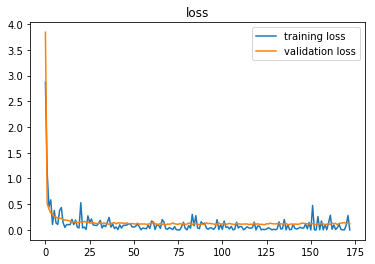

Plotting metrics...


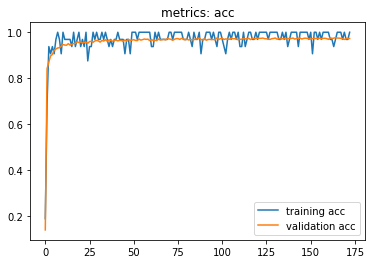

train {'acc': 0.9838182}
test {'acc': 0.9716}
{'acc': 0.9716}


In [8]:
if try_cls2:
    teacher.plt_loss()
    teacher.plt_metrics()
    train_metric = teacher.get_metrics(X_train, y_train)
    test_metric = teacher.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)
    print(test_metric)

In [9]:
# plot and show sample
if try_cls2 and False:
    n_samples = 6
    round_show = 4
    X_show = X_train
    n_data = X_show.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_show[[indices[i]]]
        label = y_train[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = teacher.predict(sample)
        pred_t = teacher.predict_softened(sample, temperature=temperature)
        pred_t2 = y_train_soft[indices[i]]
        print('sample.max()',sample.max())
        print('label',label)
        print('teacher.predict',np.round(pred,round_show))
        print('teacher.predict_softened',np.round(pred_t,round_show))
        print('y_soft',np.round(pred_t2,round_show))
        #     teacher.predict()

In [10]:
if try_cls2:
    small = build_small_model(input_dims, output_dims, session, is_student=False)
    small.train(
        X=X_train
        ,y=y_train
        ,val_set=[X_val,y_val]
        ,batch_size=32
        ,n_epochs=10
        ,display_steps=100)

Epoch 1 , step 0 , loss= 2.3068364 val_loss= 2.3394682 , acc = 0.125 val acc = 0.0962 
Epoch 1 , step 100 , loss= 0.82499224 val_loss= 0.85515046 , acc = 0.875 val acc = 0.7998 
Epoch 1 , step 200 , loss= 0.47339827 val_loss= 0.5196175 , acc = 0.90625 val acc = 0.8704 
Epoch 1 , step 300 , loss= 0.27865845 val_loss= 0.4243977 , acc = 0.96875 val acc = 0.8896 
Epoch 1 , step 400 , loss= 0.33933437 val_loss= 0.37323758 , acc = 0.90625 val acc = 0.8958 
Epoch 1 , step 500 , loss= 0.16073626 val_loss= 0.34019476 , acc = 1.0 val acc = 0.9078 
Epoch 1 , step 600 , loss= 0.34424168 val_loss= 0.31846216 , acc = 0.9375 val acc = 0.9112 
Epoch 1 , step 700 , loss= 0.30853552 val_loss= 0.30646902 , acc = 0.9375 val acc = 0.911 
Epoch 1 , step 800 , loss= 0.7850761 val_loss= 0.2914324 , acc = 0.875 val acc = 0.9218 
Epoch 1 , step 900 , loss= 0.2538721 val_loss= 0.28133312 , acc = 0.90625 val acc = 0.9258 
Epoch 1 , step 1000 , loss= 0.33922958 val_loss= 0.2650796 , acc = 0.9375 val acc = 0.9268 


Epoch 6 , step 410 , loss= 0.08736409 val_loss= 0.12362533 , acc = 0.96875 val acc = 0.9622 
Epoch 6 , step 510 , loss= 0.21193206 val_loss= 0.12349988 , acc = 0.96875 val acc = 0.9634 
Epoch 6 , step 610 , loss= 0.12303922 val_loss= 0.11909309 , acc = 0.96875 val acc = 0.965 
Epoch 6 , step 710 , loss= 0.06466118 val_loss= 0.1197991 , acc = 0.96875 val acc = 0.9646 
Epoch 6 , step 810 , loss= 0.011472615 val_loss= 0.12301493 , acc = 1.0 val acc = 0.9644 
Epoch 6 , step 910 , loss= 0.06894972 val_loss= 0.12471263 , acc = 0.96875 val acc = 0.964 
Epoch 6 , step 1010 , loss= 0.040444195 val_loss= 0.12239212 , acc = 1.0 val acc = 0.9636 
Epoch 6 , step 1110 , loss= 0.19739583 val_loss= 0.12608288 , acc = 0.96875 val acc = 0.9636 
Epoch 6 , step 1210 , loss= 0.018936938 val_loss= 0.123278104 , acc = 1.0 val acc = 0.963 
Epoch 6 , step 1310 , loss= 0.30953833 val_loss= 0.12571238 , acc = 0.96875 val acc = 0.9628 
Epoch 6 , step 1410 , loss= 0.022956692 val_loss= 0.11872095 , acc = 1.0 val a

Plotting loss...


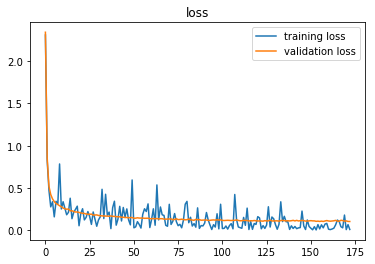

Plotting metrics...


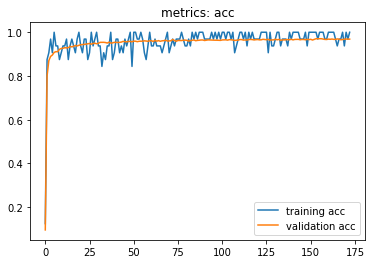

train {'acc': 0.98194546}
test {'acc': 0.9671}


In [11]:
if try_cls2:
    small.plt_loss()
    small.plt_metrics()
    train_metric = small.get_metrics(X_train, y_train)
    test_metric = small.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

Training student with temperature = 2 , coef = 1 .
Epoch 1 , step 0 , loss= 4.5798845 val_loss= 4.5887294 , acc = 0.15625 val acc = 0.1304 
Epoch 1 , step 100 , loss= 3.3211834 val_loss= 3.3264642 , acc = 0.8125 val acc = 0.7724 
Epoch 1 , step 200 , loss= 3.1382258 val_loss= 3.1213543 , acc = 0.78125 val acc = 0.8254 
Epoch 1 , step 300 , loss= 3.0157194 val_loss= 3.0476372 , acc = 0.84375 val acc = 0.861 
Epoch 1 , step 400 , loss= 3.0124788 val_loss= 3.0061193 , acc = 0.8125 val acc = 0.8698 
Epoch 1 , step 500 , loss= 3.127327 val_loss= 2.9770803 , acc = 0.875 val acc = 0.887 
Epoch 1 , step 600 , loss= 3.1331468 val_loss= 2.9546628 , acc = 0.75 val acc = 0.8904 
Epoch 1 , step 700 , loss= 2.963634 val_loss= 2.9431314 , acc = 0.90625 val acc = 0.8936 
Epoch 1 , step 800 , loss= 2.9708762 val_loss= 2.9270165 , acc = 0.84375 val acc = 0.9022 
Epoch 1 , step 900 , loss= 2.9706001 val_loss= 2.9089544 , acc = 0.84375 val acc = 0.9042 
Epoch 1 , step 1000 , loss= 2.9407587 val_loss= 2.89

Epoch 6 , step 510 , loss= 2.8158543 val_loss= 2.7401617 , acc = 0.90625 val acc = 0.9596 
Epoch 6 , step 610 , loss= 2.7613165 val_loss= 2.7387881 , acc = 1.0 val acc = 0.962 
Epoch 6 , step 710 , loss= 2.685093 val_loss= 2.7417355 , acc = 0.96875 val acc = 0.9608 
Epoch 6 , step 810 , loss= 2.809469 val_loss= 2.7449903 , acc = 0.90625 val acc = 0.9598 
Epoch 6 , step 910 , loss= 2.7366366 val_loss= 2.740572 , acc = 1.0 val acc = 0.963 
Epoch 6 , step 1010 , loss= 2.793848 val_loss= 2.7377777 , acc = 0.9375 val acc = 0.9608 
Epoch 6 , step 1110 , loss= 2.8769507 val_loss= 2.7411685 , acc = 0.90625 val acc = 0.9574 
Epoch 6 , step 1210 , loss= 2.7539375 val_loss= 2.7411718 , acc = 0.90625 val acc = 0.9612 
Epoch 6 , step 1310 , loss= 2.7550585 val_loss= 2.739298 , acc = 0.90625 val acc = 0.957 
Epoch 6 , step 1410 , loss= 2.7252705 val_loss= 2.74004 , acc = 0.96875 val acc = 0.958 
Epoch 6 , step 1510 , loss= 2.5428271 val_loss= 2.7383597 , acc = 1.0 val acc = 0.9576 
Epoch 6 , step 16

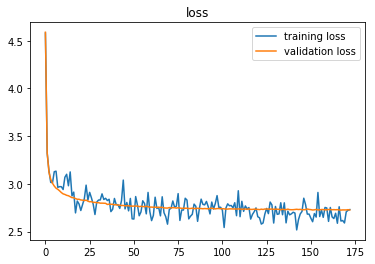

Plotting metrics...


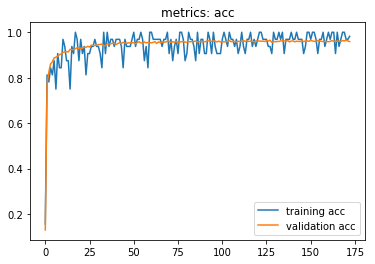

train {'acc': 0.96565455}
test {'acc': 0.9542}
Training student with temperature = 2 , coef = 4 .
Epoch 1 , step 0 , loss= 11.398205 val_loss= 11.374397 , acc = 0.0625 val acc = 0.1212 
Epoch 1 , step 100 , loss= 10.188769 val_loss= 10.081619 , acc = 0.375 val acc = 0.3942 
Epoch 1 , step 200 , loss= 9.944621 val_loss= 9.839935 , acc = 0.75 val acc = 0.6268 
Epoch 1 , step 300 , loss= 9.566265 val_loss= 9.763233 , acc = 0.71875 val acc = 0.633 
Epoch 1 , step 400 , loss= 9.898338 val_loss= 9.719152 , acc = 0.59375 val acc = 0.6652 
Epoch 1 , step 500 , loss= 9.629627 val_loss= 9.681951 , acc = 0.6875 val acc = 0.6972 
Epoch 1 , step 600 , loss= 9.843585 val_loss= 9.654866 , acc = 0.6875 val acc = 0.7068 
Epoch 1 , step 700 , loss= 9.196408 val_loss= 9.643053 , acc = 0.53125 val acc = 0.693 
Epoch 1 , step 800 , loss= 9.727466 val_loss= 9.626722 , acc = 0.65625 val acc = 0.7198 
Epoch 1 , step 900 , loss= 9.549775 val_loss= 9.6040745 , acc = 0.75 val acc = 0.7628 
Epoch 1 , step 1000 , 

Epoch 6 , step 610 , loss= 9.366848 val_loss= 9.436492 , acc = 0.78125 val acc = 0.8172 
Epoch 6 , step 710 , loss= 9.981387 val_loss= 9.437208 , acc = 0.78125 val acc = 0.8458 
Epoch 6 , step 810 , loss= 9.311717 val_loss= 9.436146 , acc = 0.75 val acc = 0.8356 
Epoch 6 , step 910 , loss= 9.377462 val_loss= 9.43454 , acc = 0.84375 val acc = 0.8424 
Epoch 6 , step 1010 , loss= 9.3866205 val_loss= 9.444249 , acc = 0.90625 val acc = 0.8366 
Epoch 6 , step 1110 , loss= 9.514303 val_loss= 9.434719 , acc = 0.90625 val acc = 0.849 
Epoch 6 , step 1210 , loss= 9.296965 val_loss= 9.438009 , acc = 0.8125 val acc = 0.8458 
Epoch 6 , step 1310 , loss= 9.223173 val_loss= 9.431567 , acc = 0.78125 val acc = 0.8476 
Epoch 6 , step 1410 , loss= 9.326992 val_loss= 9.434322 , acc = 0.8125 val acc = 0.838 
Epoch 6 , step 1510 , loss= 9.46855 val_loss= 9.43463 , acc = 0.6875 val acc = 0.8266 
Epoch 6 , step 1610 , loss= 9.354976 val_loss= 9.432662 , acc = 0.78125 val acc = 0.823 
Epoch 6 , step 1710 , los

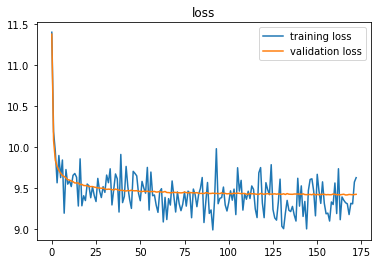

Plotting metrics...


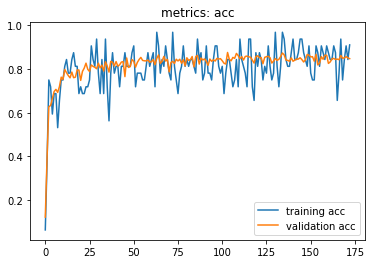

train {'acc': 0.8438}
test {'acc': 0.8425}
Training student with temperature = 3 , coef = 1 .
Epoch 1 , step 0 , loss= 4.5453863 val_loss= 4.646959 , acc = 0.03125 val acc = 0.1006 
Epoch 1 , step 100 , loss= 3.143488 val_loss= 3.2909622 , acc = 0.875 val acc = 0.7832 
Epoch 1 , step 200 , loss= 2.9800649 val_loss= 3.0636692 , acc = 0.90625 val acc = 0.8464 
Epoch 1 , step 300 , loss= 3.0039735 val_loss= 2.975782 , acc = 0.84375 val acc = 0.8792 
Epoch 1 , step 400 , loss= 2.9468074 val_loss= 2.9328113 , acc = 0.875 val acc = 0.8892 
Epoch 1 , step 500 , loss= 2.9411845 val_loss= 2.9063733 , acc = 0.84375 val acc = 0.8892 
Epoch 1 , step 600 , loss= 3.0150146 val_loss= 2.8828309 , acc = 0.875 val acc = 0.8992 
Epoch 1 , step 700 , loss= 3.0225594 val_loss= 2.867167 , acc = 0.8125 val acc = 0.905 
Epoch 1 , step 800 , loss= 2.962654 val_loss= 2.851808 , acc = 0.84375 val acc = 0.909 
Epoch 1 , step 900 , loss= 2.9683344 val_loss= 2.8386073 , acc = 0.90625 val acc = 0.9118 
Epoch 1 , ste

Epoch 6 , step 510 , loss= 2.658611 val_loss= 2.6366506 , acc = 1.0 val acc = 0.9636 
Epoch 6 , step 610 , loss= 2.5711858 val_loss= 2.6358504 , acc = 0.96875 val acc = 0.9634 
Epoch 6 , step 710 , loss= 2.7181401 val_loss= 2.6359086 , acc = 0.9375 val acc = 0.9648 
Epoch 6 , step 810 , loss= 2.5669374 val_loss= 2.632074 , acc = 1.0 val acc = 0.9646 
Epoch 6 , step 910 , loss= 2.520795 val_loss= 2.6322618 , acc = 0.96875 val acc = 0.964 
Epoch 6 , step 1010 , loss= 2.7394733 val_loss= 2.6304805 , acc = 0.90625 val acc = 0.9646 
Epoch 6 , step 1110 , loss= 2.4963834 val_loss= 2.6320758 , acc = 1.0 val acc = 0.9646 
Epoch 6 , step 1210 , loss= 2.783107 val_loss= 2.630493 , acc = 0.9375 val acc = 0.9656 
Epoch 6 , step 1310 , loss= 2.695182 val_loss= 2.6315634 , acc = 0.9375 val acc = 0.966 
Epoch 6 , step 1410 , loss= 2.6869528 val_loss= 2.6311073 , acc = 0.9375 val acc = 0.9646 
Epoch 6 , step 1510 , loss= 2.7285278 val_loss= 2.6330774 , acc = 0.9375 val acc = 0.962 
Epoch 6 , step 1610

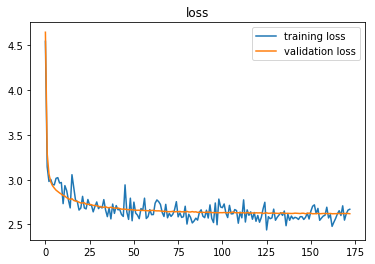

Plotting metrics...


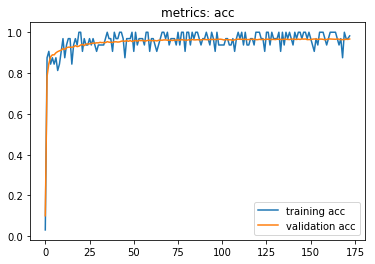

train {'acc': 0.97505456}
test {'acc': 0.9617}
Training student with temperature = 3 , coef = 9 .
Epoch 1 , step 0 , loss= 23.095692 val_loss= 23.014502 , acc = 0.03125 val acc = 0.079 
Epoch 1 , step 100 , loss= 21.73507 val_loss= 21.573107 , acc = 0.40625 val acc = 0.5332 
Epoch 1 , step 200 , loss= 21.42665 val_loss= 21.273857 , acc = 0.625 val acc = 0.6488 
Epoch 1 , step 300 , loss= 21.407537 val_loss= 21.17108 , acc = 0.71875 val acc = 0.7132 
Epoch 1 , step 400 , loss= 21.029322 val_loss= 21.11251 , acc = 0.78125 val acc = 0.7344 
Epoch 1 , step 500 , loss= 21.33073 val_loss= 21.077173 , acc = 0.71875 val acc = 0.7536 
Epoch 1 , step 600 , loss= 21.198479 val_loss= 21.043581 , acc = 0.75 val acc = 0.775 
Epoch 1 , step 700 , loss= 21.086067 val_loss= 21.023357 , acc = 0.75 val acc = 0.7882 
Epoch 1 , step 800 , loss= 21.38603 val_loss= 20.98931 , acc = 0.71875 val acc = 0.7832 
Epoch 1 , step 900 , loss= 21.054619 val_loss= 20.975655 , acc = 0.78125 val acc = 0.811 
Epoch 1 , st

Epoch 6 , step 410 , loss= 20.72704 val_loss= 20.766867 , acc = 0.8125 val acc = 0.8748 
Epoch 6 , step 510 , loss= 20.78957 val_loss= 20.770575 , acc = 0.84375 val acc = 0.878 
Epoch 6 , step 610 , loss= 20.604376 val_loss= 20.769138 , acc = 0.9375 val acc = 0.8824 
Epoch 6 , step 710 , loss= 20.83867 val_loss= 20.765053 , acc = 0.9375 val acc = 0.89 
Epoch 6 , step 810 , loss= 20.532774 val_loss= 20.76348 , acc = 0.96875 val acc = 0.8782 
Epoch 6 , step 910 , loss= 20.707258 val_loss= 20.763988 , acc = 0.9375 val acc = 0.8798 
Epoch 6 , step 1010 , loss= 20.781794 val_loss= 20.766321 , acc = 0.9375 val acc = 0.8796 
Epoch 6 , step 1110 , loss= 21.044542 val_loss= 20.766783 , acc = 0.84375 val acc = 0.8826 
Epoch 6 , step 1210 , loss= 20.675196 val_loss= 20.7757 , acc = 0.84375 val acc = 0.8856 
Epoch 6 , step 1310 , loss= 20.892326 val_loss= 20.76217 , acc = 0.84375 val acc = 0.8846 
Epoch 6 , step 1410 , loss= 20.42349 val_loss= 20.763735 , acc = 0.9375 val acc = 0.874 
Epoch 6 , st

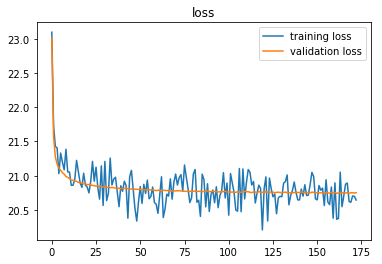

Plotting metrics...


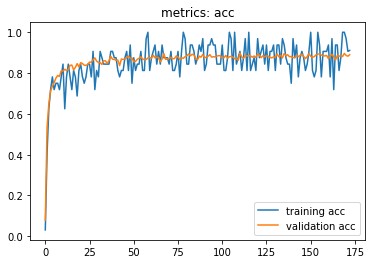

train {'acc': 0.89436364}
test {'acc': 0.8908}
Training student with temperature = 5 , coef = 1 .
Epoch 1 , step 0 , loss= 4.623787 val_loss= 4.65287 , acc = 0.09375 val acc = 0.1294 
Epoch 1 , step 100 , loss= 3.2188385 val_loss= 3.2678742 , acc = 0.75 val acc = 0.7898 
Epoch 1 , step 200 , loss= 3.037775 val_loss= 2.9422777 , acc = 0.84375 val acc = 0.8668 
Epoch 1 , step 300 , loss= 2.9569783 val_loss= 2.848419 , acc = 0.84375 val acc = 0.886 
Epoch 1 , step 400 , loss= 2.8278434 val_loss= 2.8055053 , acc = 0.875 val acc = 0.9034 
Epoch 1 , step 500 , loss= 2.8894124 val_loss= 2.770322 , acc = 0.78125 val acc = 0.9058 
Epoch 1 , step 600 , loss= 2.7909596 val_loss= 2.7446404 , acc = 0.90625 val acc = 0.9144 
Epoch 1 , step 700 , loss= 2.7345326 val_loss= 2.7338653 , acc = 0.875 val acc = 0.9192 
Epoch 1 , step 800 , loss= 2.729199 val_loss= 2.7220042 , acc = 0.90625 val acc = 0.916 
Epoch 1 , step 900 , loss= 2.8405972 val_loss= 2.7033012 , acc = 0.875 val acc = 0.9198 
Epoch 1 , st

Epoch 6 , step 510 , loss= 2.616118 val_loss= 2.5435383 , acc = 0.9375 val acc = 0.96 
Epoch 6 , step 610 , loss= 2.4730592 val_loss= 2.5431614 , acc = 1.0 val acc = 0.9596 
Epoch 6 , step 710 , loss= 2.4362583 val_loss= 2.5407715 , acc = 1.0 val acc = 0.963 
Epoch 6 , step 810 , loss= 2.5040634 val_loss= 2.544198 , acc = 0.96875 val acc = 0.9614 
Epoch 6 , step 910 , loss= 2.465465 val_loss= 2.540883 , acc = 1.0 val acc = 0.9612 
Epoch 6 , step 1010 , loss= 2.64716 val_loss= 2.5413144 , acc = 0.96875 val acc = 0.9622 
Epoch 6 , step 1110 , loss= 2.470041 val_loss= 2.5396185 , acc = 0.96875 val acc = 0.9622 
Epoch 6 , step 1210 , loss= 2.4859128 val_loss= 2.5414298 , acc = 0.96875 val acc = 0.9626 
Epoch 6 , step 1310 , loss= 2.6561074 val_loss= 2.5401769 , acc = 0.9375 val acc = 0.9642 
Epoch 6 , step 1410 , loss= 2.5349326 val_loss= 2.5406923 , acc = 0.96875 val acc = 0.9616 
Epoch 6 , step 1510 , loss= 2.4932957 val_loss= 2.5391204 , acc = 1.0 val acc = 0.9618 
Epoch 6 , step 1610 ,

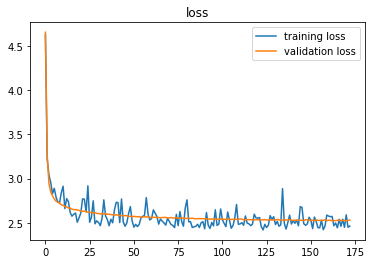

Plotting metrics...


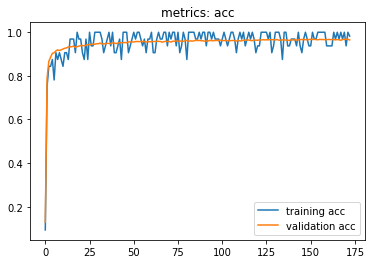

train {'acc': 0.9744}
test {'acc': 0.9607}
Training student with temperature = 5 , coef = 25 .
Epoch 1 , step 0 , loss= 59.714695 val_loss= 59.805973 , acc = 0.125 val acc = 0.0766 
Epoch 1 , step 100 , loss= 58.350998 val_loss= 58.00408 , acc = 0.28125 val acc = 0.339 
Epoch 1 , step 200 , loss= 57.372696 val_loss= 57.647446 , acc = 0.625 val acc = 0.5968 
Epoch 1 , step 300 , loss= 57.03369 val_loss= 57.53461 , acc = 0.71875 val acc = 0.5828 
Epoch 1 , step 400 , loss= 57.48309 val_loss= 57.48977 , acc = 0.5625 val acc = 0.5794 
Epoch 1 , step 500 , loss= 57.50647 val_loss= 57.442223 , acc = 0.625 val acc = 0.667 
Epoch 1 , step 600 , loss= 56.97754 val_loss= 57.402992 , acc = 0.75 val acc = 0.6696 
Epoch 1 , step 700 , loss= 57.619514 val_loss= 57.386 , acc = 0.71875 val acc = 0.6864 
Epoch 1 , step 800 , loss= 57.404568 val_loss= 57.361122 , acc = 0.78125 val acc = 0.7096 
Epoch 1 , step 900 , loss= 57.288628 val_loss= 57.333675 , acc = 0.59375 val acc = 0.6744 
Epoch 1 , step 1000

Epoch 6 , step 510 , loss= 57.16011 val_loss= 57.098244 , acc = 0.9375 val acc = 0.8084 
Epoch 6 , step 610 , loss= 57.16523 val_loss= 57.10397 , acc = 0.84375 val acc = 0.7962 
Epoch 6 , step 710 , loss= 57.69043 val_loss= 57.100834 , acc = 0.84375 val acc = 0.8122 
Epoch 6 , step 810 , loss= 57.284256 val_loss= 57.10075 , acc = 0.9375 val acc = 0.8182 
Epoch 6 , step 910 , loss= 57.43062 val_loss= 57.09346 , acc = 0.71875 val acc = 0.8212 
Epoch 6 , step 1010 , loss= 56.775776 val_loss= 57.092545 , acc = 0.8125 val acc = 0.7958 
Epoch 6 , step 1110 , loss= 57.260014 val_loss= 57.09646 , acc = 0.90625 val acc = 0.8078 
Epoch 6 , step 1210 , loss= 57.043423 val_loss= 57.10117 , acc = 0.8125 val acc = 0.791 
Epoch 6 , step 1310 , loss= 57.000305 val_loss= 57.115818 , acc = 0.8125 val acc = 0.7984 
Epoch 6 , step 1410 , loss= 57.080856 val_loss= 57.093975 , acc = 0.78125 val acc = 0.8266 
Epoch 6 , step 1510 , loss= 57.052166 val_loss= 57.091682 , acc = 0.84375 val acc = 0.82 
Epoch 6 , 

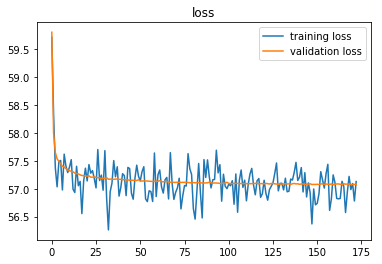

Plotting metrics...


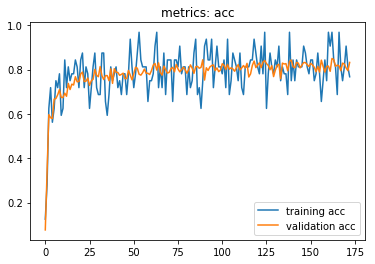

train {'acc': 0.8366182}
test {'acc': 0.831}
Training student with temperature = 10 , coef = 1 .
Epoch 1 , step 0 , loss= 4.6145115 val_loss= 4.6922655 , acc = 0.1875 val acc = 0.0986 
Epoch 1 , step 100 , loss= 3.339664 val_loss= 3.1772323 , acc = 0.71875 val acc = 0.7912 
Epoch 1 , step 200 , loss= 2.8784695 val_loss= 2.849768 , acc = 0.84375 val acc = 0.8692 
Epoch 1 , step 300 , loss= 2.7684073 val_loss= 2.7683682 , acc = 0.875 val acc = 0.885 
Epoch 1 , step 400 , loss= 2.5932903 val_loss= 2.7297013 , acc = 0.96875 val acc = 0.8956 
Epoch 1 , step 500 , loss= 2.586123 val_loss= 2.7141874 , acc = 0.9375 val acc = 0.8948 
Epoch 1 , step 600 , loss= 2.6217544 val_loss= 2.6776075 , acc = 0.96875 val acc = 0.9098 
Epoch 1 , step 700 , loss= 2.6361768 val_loss= 2.6629324 , acc = 0.9375 val acc = 0.914 
Epoch 1 , step 800 , loss= 2.61675 val_loss= 2.6536028 , acc = 0.90625 val acc = 0.915 
Epoch 1 , step 900 , loss= 2.7483568 val_loss= 2.6517856 , acc = 0.875 val acc = 0.9158 
Epoch 1 , 

Epoch 6 , step 510 , loss= 2.4852087 val_loss= 2.4787273 , acc = 0.96875 val acc = 0.9642 
Epoch 6 , step 610 , loss= 2.4138517 val_loss= 2.4834394 , acc = 1.0 val acc = 0.9618 
Epoch 6 , step 710 , loss= 2.4496043 val_loss= 2.480078 , acc = 0.96875 val acc = 0.9644 
Epoch 6 , step 810 , loss= 2.4413555 val_loss= 2.4853685 , acc = 0.96875 val acc = 0.9632 
Epoch 6 , step 910 , loss= 2.4041193 val_loss= 2.4760213 , acc = 1.0 val acc = 0.9672 
Epoch 6 , step 1010 , loss= 2.5252037 val_loss= 2.4793131 , acc = 0.96875 val acc = 0.9628 
Epoch 6 , step 1110 , loss= 2.4450223 val_loss= 2.4789767 , acc = 0.96875 val acc = 0.9656 
Epoch 6 , step 1210 , loss= 2.45986 val_loss= 2.478309 , acc = 0.96875 val acc = 0.9648 
Epoch 6 , step 1310 , loss= 2.4997494 val_loss= 2.4809875 , acc = 0.96875 val acc = 0.9642 
Epoch 6 , step 1410 , loss= 2.4017045 val_loss= 2.478013 , acc = 1.0 val acc = 0.9644 
Epoch 6 , step 1510 , loss= 2.483128 val_loss= 2.477721 , acc = 0.9375 val acc = 0.964 
Epoch 6 , step

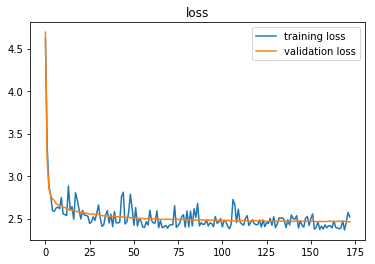

Plotting metrics...


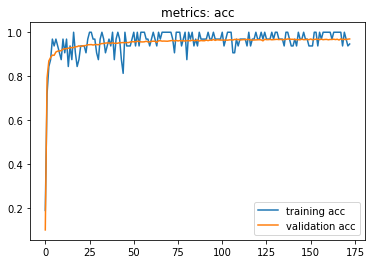

train {'acc': 0.9808546}
test {'acc': 0.9676}
Training student with temperature = 10 , coef = 100 .
Epoch 1 , step 0 , loss= 232.61119 val_loss= 232.69582 , acc = 0.1875 val acc = 0.1174 
Epoch 1 , step 100 , loss= 230.97041 val_loss= 230.76665 , acc = 0.4375 val acc = 0.5024 
Epoch 1 , step 200 , loss= 230.96492 val_loss= 230.49745 , acc = 0.5625 val acc = 0.649 
Epoch 1 , step 300 , loss= 230.26434 val_loss= 230.39095 , acc = 0.8125 val acc = 0.704 
Epoch 1 , step 400 , loss= 230.16112 val_loss= 230.33586 , acc = 0.6875 val acc = 0.7314 
Epoch 1 , step 500 , loss= 230.21002 val_loss= 230.29948 , acc = 0.75 val acc = 0.7566 
Epoch 1 , step 600 , loss= 230.40506 val_loss= 230.26518 , acc = 0.6875 val acc = 0.7452 
Epoch 1 , step 700 , loss= 230.87636 val_loss= 230.24345 , acc = 0.6875 val acc = 0.777 
Epoch 1 , step 800 , loss= 230.25882 val_loss= 230.22192 , acc = 0.84375 val acc = 0.7536 
Epoch 1 , step 900 , loss= 230.1548 val_loss= 230.20859 , acc = 0.59375 val acc = 0.741 
Epoch 1

Epoch 6 , step 410 , loss= 230.21156 val_loss= 229.99191 , acc = 0.8125 val acc = 0.8678 
Epoch 6 , step 510 , loss= 230.05356 val_loss= 229.99095 , acc = 0.875 val acc = 0.8596 
Epoch 6 , step 610 , loss= 230.29463 val_loss= 229.98535 , acc = 0.875 val acc = 0.8568 
Epoch 6 , step 710 , loss= 230.09517 val_loss= 229.99355 , acc = 0.90625 val acc = 0.8442 
Epoch 6 , step 810 , loss= 230.27434 val_loss= 229.98488 , acc = 0.78125 val acc = 0.8414 
Epoch 6 , step 910 , loss= 230.00314 val_loss= 229.99773 , acc = 0.90625 val acc = 0.8594 
Epoch 6 , step 1010 , loss= 230.0999 val_loss= 229.98698 , acc = 0.8125 val acc = 0.8512 
Epoch 6 , step 1110 , loss= 229.62845 val_loss= 229.99013 , acc = 0.84375 val acc = 0.8642 
Epoch 6 , step 1210 , loss= 229.84962 val_loss= 229.98912 , acc = 0.8125 val acc = 0.8628 
Epoch 6 , step 1310 , loss= 230.12698 val_loss= 229.98839 , acc = 0.875 val acc = 0.8634 
Epoch 6 , step 1410 , loss= 229.98991 val_loss= 229.98653 , acc = 0.84375 val acc = 0.8458 
Epoc

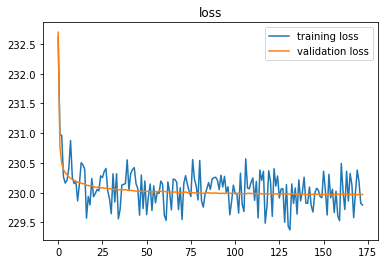

Plotting metrics...


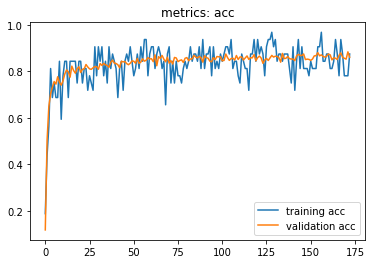

train {'acc': 0.86129093}
test {'acc': 0.8533}
Training student with temperature = 20 , coef = 1 .
Epoch 1 , step 0 , loss= 4.57732 val_loss= 4.6233916 , acc = 0.15625 val acc = 0.118 
Epoch 1 , step 100 , loss= 3.2774124 val_loss= 3.1843789 , acc = 0.84375 val acc = 0.806 
Epoch 1 , step 200 , loss= 2.6825883 val_loss= 2.813792 , acc = 0.875 val acc = 0.8726 
Epoch 1 , step 300 , loss= 2.7576864 val_loss= 2.726717 , acc = 0.875 val acc = 0.8876 
Epoch 1 , step 400 , loss= 2.5661008 val_loss= 2.6876702 , acc = 0.9375 val acc = 0.8924 
Epoch 1 , step 500 , loss= 2.4783556 val_loss= 2.6616535 , acc = 0.96875 val acc = 0.9018 
Epoch 1 , step 600 , loss= 2.5754933 val_loss= 2.6357214 , acc = 0.96875 val acc = 0.9094 
Epoch 1 , step 700 , loss= 2.4873967 val_loss= 2.6246746 , acc = 0.96875 val acc = 0.914 
Epoch 1 , step 800 , loss= 2.581952 val_loss= 2.617898 , acc = 0.90625 val acc = 0.9122 
Epoch 1 , step 900 , loss= 2.6009586 val_loss= 2.6027815 , acc = 0.90625 val acc = 0.916 
Epoch 1 

Epoch 6 , step 410 , loss= 2.3461154 val_loss= 2.449346 , acc = 1.0 val acc = 0.9658 
Epoch 6 , step 510 , loss= 2.477177 val_loss= 2.450788 , acc = 0.90625 val acc = 0.965 
Epoch 6 , step 610 , loss= 2.351019 val_loss= 2.446625 , acc = 1.0 val acc = 0.9656 
Epoch 6 , step 710 , loss= 2.3676481 val_loss= 2.4500268 , acc = 1.0 val acc = 0.9632 
Epoch 6 , step 810 , loss= 2.4054961 val_loss= 2.4452791 , acc = 0.96875 val acc = 0.9662 
Epoch 6 , step 910 , loss= 2.4823294 val_loss= 2.4491735 , acc = 0.96875 val acc = 0.964 
Epoch 6 , step 1010 , loss= 2.481602 val_loss= 2.4429586 , acc = 0.96875 val acc = 0.966 
Epoch 6 , step 1110 , loss= 2.3992956 val_loss= 2.4485738 , acc = 0.96875 val acc = 0.9638 
Epoch 6 , step 1210 , loss= 2.4120631 val_loss= 2.4476767 , acc = 0.9375 val acc = 0.9644 
Epoch 6 , step 1310 , loss= 2.3796768 val_loss= 2.448675 , acc = 1.0 val acc = 0.9634 
Epoch 6 , step 1410 , loss= 2.4228601 val_loss= 2.4465876 , acc = 0.9375 val acc = 0.9648 
Epoch 6 , step 1510 , 

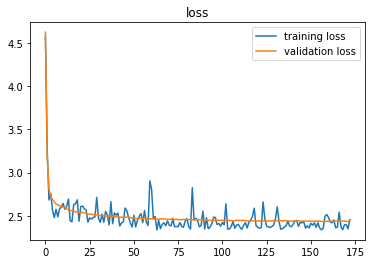

Plotting metrics...


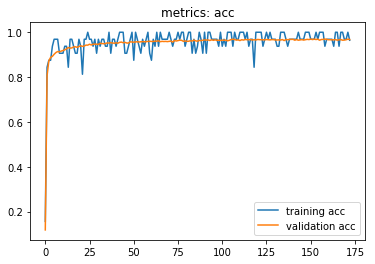

train {'acc': 0.97916365}
test {'acc': 0.9656}
Training student with temperature = 20 , coef = 400 .
Epoch 1 , step 0 , loss= 923.3087 val_loss= 923.3581 , acc = 0.03125 val acc = 0.0678 
Epoch 1 , step 100 , loss= 922.1837 val_loss= 921.99786 , acc = 0.5625 val acc = 0.5854 
Epoch 1 , step 200 , loss= 921.2961 val_loss= 921.6864 , acc = 0.78125 val acc = 0.776 
Epoch 1 , step 300 , loss= 921.29346 val_loss= 921.5992 , acc = 0.84375 val acc = 0.798 
Epoch 1 , step 400 , loss= 921.31396 val_loss= 921.56177 , acc = 0.8125 val acc = 0.8328 
Epoch 1 , step 500 , loss= 921.27374 val_loss= 921.51715 , acc = 0.75 val acc = 0.8248 
Epoch 1 , step 600 , loss= 921.046 val_loss= 921.4905 , acc = 0.9375 val acc = 0.8346 
Epoch 1 , step 700 , loss= 921.9315 val_loss= 921.46924 , acc = 0.78125 val acc = 0.8518 
Epoch 1 , step 800 , loss= 920.9837 val_loss= 921.45544 , acc = 0.8125 val acc = 0.8528 
Epoch 1 , step 900 , loss= 921.38885 val_loss= 921.4339 , acc = 0.84375 val acc = 0.8426 
Epoch 1 , st

Epoch 6 , step 510 , loss= 921.2978 val_loss= 921.2507 , acc = 0.90625 val acc = 0.9082 
Epoch 6 , step 610 , loss= 920.8863 val_loss= 921.2562 , acc = 0.90625 val acc = 0.9078 
Epoch 6 , step 710 , loss= 921.1824 val_loss= 921.25305 , acc = 1.0 val acc = 0.9048 
Epoch 6 , step 810 , loss= 920.92505 val_loss= 921.2562 , acc = 0.90625 val acc = 0.9018 
Epoch 6 , step 910 , loss= 921.1796 val_loss= 921.25665 , acc = 0.9375 val acc = 0.8928 
Epoch 6 , step 1010 , loss= 921.3983 val_loss= 921.2568 , acc = 0.90625 val acc = 0.9122 
Epoch 6 , step 1110 , loss= 921.4119 val_loss= 921.25616 , acc = 0.875 val acc = 0.9116 
Epoch 6 , step 1210 , loss= 921.13544 val_loss= 921.2498 , acc = 0.9375 val acc = 0.9056 
Epoch 6 , step 1310 , loss= 921.21497 val_loss= 921.2468 , acc = 0.90625 val acc = 0.908 
Epoch 6 , step 1410 , loss= 920.76416 val_loss= 921.2604 , acc = 0.9375 val acc = 0.905 
Epoch 6 , step 1510 , loss= 921.60864 val_loss= 921.246 , acc = 0.90625 val acc = 0.9052 
Epoch 6 , step 1610

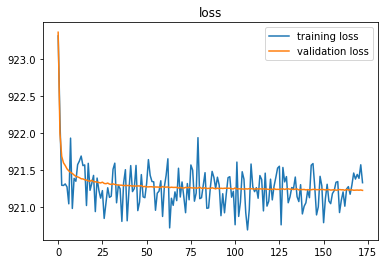

Plotting metrics...


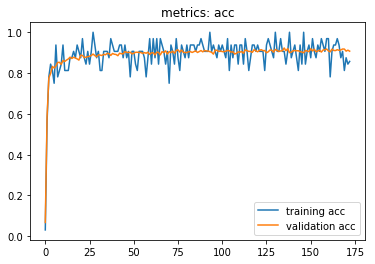

train {'acc': 0.9125818}
test {'acc': 0.9067}
Training student with temperature = 30 , coef = 1 .
Epoch 1 , step 0 , loss= 4.6328816 val_loss= 4.6543164 , acc = 0.125 val acc = 0.108 
Epoch 1 , step 100 , loss= 3.2493117 val_loss= 3.178679 , acc = 0.875 val acc = 0.8154 
Epoch 1 , step 200 , loss= 2.8915327 val_loss= 2.8468897 , acc = 0.8125 val acc = 0.8572 
Epoch 1 , step 300 , loss= 2.6603756 val_loss= 2.7333667 , acc = 0.90625 val acc = 0.8898 
Epoch 1 , step 400 , loss= 2.6895876 val_loss= 2.6864371 , acc = 0.90625 val acc = 0.899 
Epoch 1 , step 500 , loss= 2.6645036 val_loss= 2.659028 , acc = 0.90625 val acc = 0.9052 
Epoch 1 , step 600 , loss= 2.609635 val_loss= 2.6447265 , acc = 0.875 val acc = 0.907 
Epoch 1 , step 700 , loss= 2.4717443 val_loss= 2.62632 , acc = 0.96875 val acc = 0.9102 
Epoch 1 , step 800 , loss= 2.4827385 val_loss= 2.6098857 , acc = 0.96875 val acc = 0.9164 
Epoch 1 , step 900 , loss= 2.5992165 val_loss= 2.6069977 , acc = 0.9375 val acc = 0.9152 
Epoch 1 , 

Epoch 6 , step 410 , loss= 2.339816 val_loss= 2.4408274 , acc = 1.0 val acc = 0.964 
Epoch 6 , step 510 , loss= 2.4430888 val_loss= 2.4423745 , acc = 0.96875 val acc = 0.9628 
Epoch 6 , step 610 , loss= 2.398352 val_loss= 2.444611 , acc = 0.96875 val acc = 0.961 
Epoch 6 , step 710 , loss= 2.3699422 val_loss= 2.4433985 , acc = 0.96875 val acc = 0.963 
Epoch 6 , step 810 , loss= 2.3821921 val_loss= 2.4514053 , acc = 0.96875 val acc = 0.9608 
Epoch 6 , step 910 , loss= 2.3709464 val_loss= 2.4389486 , acc = 0.96875 val acc = 0.9634 
Epoch 6 , step 1010 , loss= 2.3950639 val_loss= 2.4400353 , acc = 1.0 val acc = 0.963 
Epoch 6 , step 1110 , loss= 2.357388 val_loss= 2.4462051 , acc = 1.0 val acc = 0.9614 
Epoch 6 , step 1210 , loss= 2.3582773 val_loss= 2.438918 , acc = 0.96875 val acc = 0.9648 
Epoch 6 , step 1310 , loss= 2.4047656 val_loss= 2.441331 , acc = 0.96875 val acc = 0.9624 
Epoch 6 , step 1410 , loss= 2.432641 val_loss= 2.4405673 , acc = 0.96875 val acc = 0.9634 
Epoch 6 , step 15

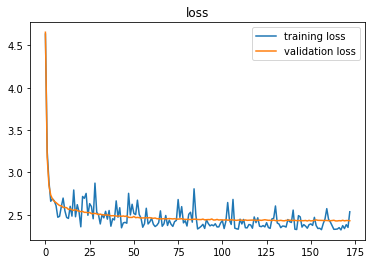

Plotting metrics...


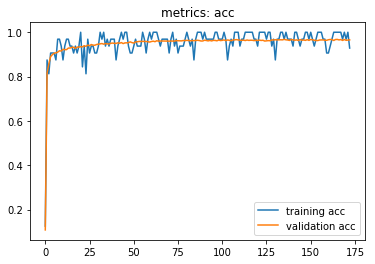

train {'acc': 0.9799273}
test {'acc': 0.9651}
Training student with temperature = 30 , coef = 900 .
Epoch 1 , step 0 , loss= 2074.624 val_loss= 2074.6716 , acc = 0.15625 val acc = 0.089 
Epoch 1 , step 100 , loss= 2072.9067 val_loss= 2073.0525 , acc = 0.5 val acc = 0.4132 
Epoch 1 , step 200 , loss= 2073.1602 val_loss= 2072.7222 , acc = 0.71875 val acc = 0.6764 
Epoch 1 , step 300 , loss= 2072.9 val_loss= 2072.618 , acc = 0.5625 val acc = 0.7226 
Epoch 1 , step 400 , loss= 2072.8005 val_loss= 2072.547 , acc = 0.65625 val acc = 0.7392 
Epoch 1 , step 500 , loss= 2072.3557 val_loss= 2072.498 , acc = 0.84375 val acc = 0.7832 
Epoch 1 , step 600 , loss= 2072.6897 val_loss= 2072.466 , acc = 0.75 val acc = 0.784 
Epoch 1 , step 700 , loss= 2072.2659 val_loss= 2072.4424 , acc = 0.78125 val acc = 0.7594 
Epoch 1 , step 800 , loss= 2072.2852 val_loss= 2072.4043 , acc = 0.78125 val acc = 0.8036 
Epoch 1 , step 900 , loss= 2073.033 val_loss= 2072.4004 , acc = 0.59375 val acc = 0.7864 
Epoch 1 , s

Epoch 6 , step 410 , loss= 2072.2559 val_loss= 2072.1926 , acc = 0.84375 val acc = 0.8656 
Epoch 6 , step 510 , loss= 2072.1875 val_loss= 2072.1875 , acc = 0.84375 val acc = 0.8802 
Epoch 6 , step 610 , loss= 2072.3333 val_loss= 2072.1877 , acc = 0.8125 val acc = 0.875 
Epoch 6 , step 710 , loss= 2072.7502 val_loss= 2072.1892 , acc = 0.90625 val acc = 0.8732 
Epoch 6 , step 810 , loss= 2072.7036 val_loss= 2072.183 , acc = 0.9375 val acc = 0.8674 
Epoch 6 , step 910 , loss= 2072.4487 val_loss= 2072.1914 , acc = 0.875 val acc = 0.8826 
Epoch 6 , step 1010 , loss= 2072.8716 val_loss= 2072.1868 , acc = 0.78125 val acc = 0.891 
Epoch 6 , step 1110 , loss= 2072.1218 val_loss= 2072.1865 , acc = 0.96875 val acc = 0.8824 
Epoch 6 , step 1210 , loss= 2072.1655 val_loss= 2072.1929 , acc = 0.875 val acc = 0.88 
Epoch 6 , step 1310 , loss= 2072.7617 val_loss= 2072.1868 , acc = 0.75 val acc = 0.8794 
Epoch 6 , step 1410 , loss= 2072.5698 val_loss= 2072.1858 , acc = 0.875 val acc = 0.8836 
Epoch 6 , 

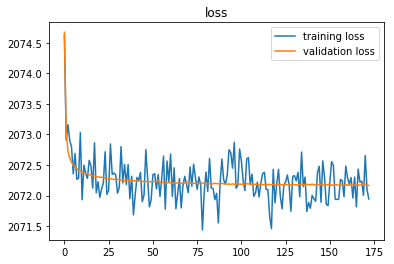

Plotting metrics...


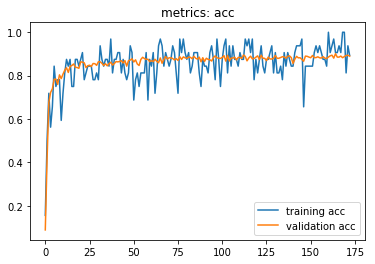

train {'acc': 0.8962182}
test {'acc': 0.8883}
Training student with temperature = 40 , coef = 1 .
Epoch 1 , step 0 , loss= 4.5602856 val_loss= 4.638146 , acc = 0.1875 val acc = 0.1132 
Epoch 1 , step 100 , loss= 3.268834 val_loss= 3.1445425 , acc = 0.8125 val acc = 0.8096 
Epoch 1 , step 200 , loss= 2.9611068 val_loss= 2.8255444 , acc = 0.84375 val acc = 0.8588 
Epoch 1 , step 300 , loss= 2.6969101 val_loss= 2.7261667 , acc = 0.8125 val acc = 0.8818 
Epoch 1 , step 400 , loss= 2.68135 val_loss= 2.6838953 , acc = 0.875 val acc = 0.8936 
Epoch 1 , step 500 , loss= 2.4808319 val_loss= 2.6393113 , acc = 1.0 val acc = 0.9064 
Epoch 1 , step 600 , loss= 2.7395499 val_loss= 2.6223981 , acc = 0.84375 val acc = 0.909 
Epoch 1 , step 700 , loss= 2.5216544 val_loss= 2.613474 , acc = 0.9375 val acc = 0.9148 
Epoch 1 , step 800 , loss= 2.5730753 val_loss= 2.597664 , acc = 0.96875 val acc = 0.9196 
Epoch 1 , step 900 , loss= 2.6853611 val_loss= 2.5876567 , acc = 0.90625 val acc = 0.92 
Epoch 1 , ste

Epoch 6 , step 410 , loss= 2.422002 val_loss= 2.4252775 , acc = 0.96875 val acc = 0.9642 
Epoch 6 , step 510 , loss= 2.508345 val_loss= 2.4272316 , acc = 0.96875 val acc = 0.9646 
Epoch 6 , step 610 , loss= 2.3697393 val_loss= 2.4244404 , acc = 1.0 val acc = 0.9642 
Epoch 6 , step 710 , loss= 2.5988884 val_loss= 2.4246335 , acc = 0.9375 val acc = 0.9658 
Epoch 6 , step 810 , loss= 2.3225822 val_loss= 2.432778 , acc = 1.0 val acc = 0.9624 
Epoch 6 , step 910 , loss= 2.3449953 val_loss= 2.4287016 , acc = 1.0 val acc = 0.9622 
Epoch 6 , step 1010 , loss= 2.361041 val_loss= 2.4295406 , acc = 1.0 val acc = 0.9638 
Epoch 6 , step 1110 , loss= 2.8430634 val_loss= 2.431653 , acc = 0.875 val acc = 0.9614 
Epoch 6 , step 1210 , loss= 2.3329093 val_loss= 2.4270146 , acc = 1.0 val acc = 0.9652 
Epoch 6 , step 1310 , loss= 2.3768947 val_loss= 2.4225183 , acc = 0.96875 val acc = 0.965 
Epoch 6 , step 1410 , loss= 2.3854887 val_loss= 2.4229512 , acc = 0.96875 val acc = 0.966 
Epoch 6 , step 1510 , lo

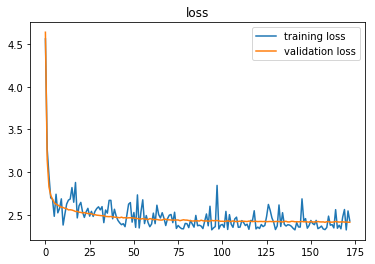

Plotting metrics...


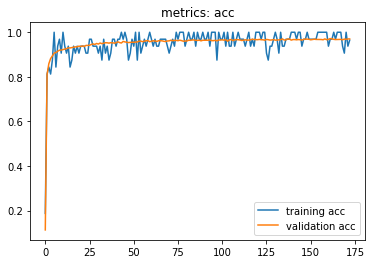

train {'acc': 0.983}
test {'acc': 0.9671}
Training student with temperature = 40 , coef = 1600 .
Epoch 1 , step 0 , loss= 3686.4521 val_loss= 3686.4902 , acc = 0.0625 val acc = 0.0826 
Epoch 1 , step 100 , loss= 3685.0784 val_loss= 3685.1562 , acc = 0.5625 val acc = 0.5612 
Epoch 1 , step 200 , loss= 3685.0015 val_loss= 3684.8652 , acc = 0.65625 val acc = 0.7284 
Epoch 1 , step 300 , loss= 3684.5593 val_loss= 3684.7766 , acc = 0.8125 val acc = 0.7746 
Epoch 1 , step 400 , loss= 3684.812 val_loss= 3684.71 , acc = 0.71875 val acc = 0.7936 
Epoch 1 , step 500 , loss= 3684.802 val_loss= 3684.6719 , acc = 0.78125 val acc = 0.801 
Epoch 1 , step 600 , loss= 3684.543 val_loss= 3684.6501 , acc = 0.84375 val acc = 0.8164 
Epoch 1 , step 700 , loss= 3684.694 val_loss= 3684.6116 , acc = 0.84375 val acc = 0.8136 
Epoch 1 , step 800 , loss= 3684.7974 val_loss= 3684.594 , acc = 0.78125 val acc = 0.818 
Epoch 1 , step 900 , loss= 3684.5522 val_loss= 3684.5793 , acc = 0.84375 val acc = 0.842 
Epoch 1 

Epoch 6 , step 410 , loss= 3684.2385 val_loss= 3684.3835 , acc = 0.9375 val acc = 0.906 
Epoch 6 , step 510 , loss= 3684.1387 val_loss= 3684.3867 , acc = 0.9375 val acc = 0.899 
Epoch 6 , step 610 , loss= 3684.217 val_loss= 3684.391 , acc = 0.875 val acc = 0.9012 
Epoch 6 , step 710 , loss= 3683.9966 val_loss= 3684.3857 , acc = 0.96875 val acc = 0.9102 
Epoch 6 , step 810 , loss= 3684.5298 val_loss= 3684.3823 , acc = 0.875 val acc = 0.9036 
Epoch 6 , step 910 , loss= 3684.3108 val_loss= 3684.3833 , acc = 0.84375 val acc = 0.893 
Epoch 6 , step 1010 , loss= 3684.707 val_loss= 3684.3848 , acc = 0.90625 val acc = 0.894 
Epoch 6 , step 1110 , loss= 3684.4539 val_loss= 3684.3857 , acc = 0.875 val acc = 0.8992 
Epoch 6 , step 1210 , loss= 3684.2634 val_loss= 3684.3828 , acc = 0.9375 val acc = 0.9094 
Epoch 6 , step 1310 , loss= 3684.1182 val_loss= 3684.3828 , acc = 0.90625 val acc = 0.9004 
Epoch 6 , step 1410 , loss= 3684.293 val_loss= 3684.3813 , acc = 0.875 val acc = 0.9046 
Epoch 6 , ste

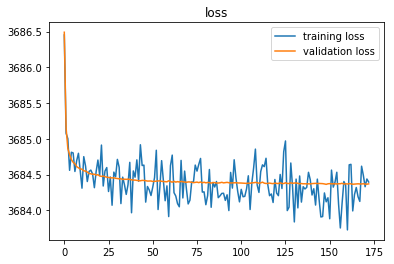

Plotting metrics...


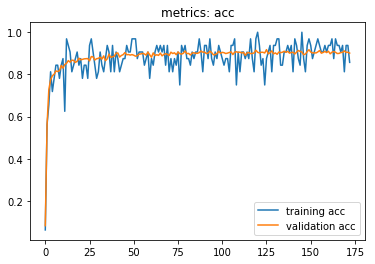

train {'acc': 0.90352726}
test {'acc': 0.8955}


In [32]:
# Multiple Experiments
temperatures = [2,3,5,10,20,30,40]
train_metrics = {}
test_metrics = {}
for temperature in temperatures:
    # initialize metrics
    train_metrics[temperature] = []
    test_metrics[temperature] = []
    # prepare softened data
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)
    for coef_softloss in [1, temperature**2, 1/(temperature**2)]:
        print('Training student with temperature =',temperature,', coef =',coef_softloss,'.')
        # build network architecture
        student = build_small_model(input_dims, output_dims, session, is_student=True)
        # train network
        student.soft_train(
            X=X_train
            ,y=y_train
            ,y_soft=y_train_soft
            ,temperature=temperature
            ,coef_softloss= coef_softloss# * temperature**2
            ,val_set=[X_val,y_val,y_val_soft]
            ,batch_size=32
            ,n_epochs=10
            ,display_steps=100)
        # show result
        print('Student performance with temperature =',temperature,', coef =',coef_softloss,'.')
        student.plt_loss()
        student.plt_metrics()
        train_metric = student.get_metrics(X_train, y_train)
        test_metric = student.get_metrics(X_test, y_test)
        print('train',train_metric)
        print('test',test_metric)
        print()
        train_metrics[temperature].append(train_metric)
        test_metrics[temperature].append(test_metric)
print(test_metrics)

In [33]:
test_metrics

{2: [{'acc': 0.9542}, {'acc': 0.8425}],
 3: [{'acc': 0.9617}, {'acc': 0.8908}],
 5: [{'acc': 0.9607}, {'acc': 0.831}],
 10: [{'acc': 0.9676}, {'acc': 0.8533}],
 20: [{'acc': 0.9656}, {'acc': 0.9067}],
 30: [{'acc': 0.9651}, {'acc': 0.8883}],
 40: [{'acc': 0.9671}, {'acc': 0.8955}]}

In [25]:
if try_cls2:
    temperature = 40
    y_train_soft = teacher.predict_softened(X_train, temperature)
    y_val_soft = teacher.predict_softened(X_val, temperature)
    y_test_soft = teacher.predict_softened(X_test, temperature)

In [26]:
if try_cls2:
    student = build_small_model(input_dims, output_dims, session, is_student=True)
    student.soft_train(
        X=X_train
        ,y=y_train
        ,y_soft=y_train_soft
        ,temperature=temperature
        ,coef_softloss= 1# * temperature**2
        ,val_set=[X_val,y_val,y_val_soft]
        ,batch_size=32
        ,n_epochs=10
        ,display_steps=100)


Epoch 1 , step 0 , loss= 4.412223 val_loss= 4.5596094 , acc = 0.25 val acc = 0.1802 
Epoch 1 , step 100 , loss= 3.1062708 val_loss= 3.1033964 , acc = 0.75 val acc = 0.8196 
Epoch 1 , step 200 , loss= 2.7245617 val_loss= 2.8055708 , acc = 0.84375 val acc = 0.8752 
Epoch 1 , step 300 , loss= 2.6882124 val_loss= 2.723763 , acc = 0.90625 val acc = 0.8872 
Epoch 1 , step 400 , loss= 2.8005128 val_loss= 2.6765242 , acc = 0.875 val acc = 0.8988 
Epoch 1 , step 500 , loss= 2.5045793 val_loss= 2.6504638 , acc = 0.9375 val acc = 0.902 
Epoch 1 , step 600 , loss= 2.6538737 val_loss= 2.635612 , acc = 0.90625 val acc = 0.91 
Epoch 1 , step 700 , loss= 2.7172868 val_loss= 2.610631 , acc = 0.875 val acc = 0.9128 
Epoch 1 , step 800 , loss= 2.5660834 val_loss= 2.6096482 , acc = 0.90625 val acc = 0.917 
Epoch 1 , step 900 , loss= 2.620118 val_loss= 2.5924923 , acc = 0.90625 val acc = 0.9204 
Epoch 1 , step 1000 , loss= 2.9903874 val_loss= 2.6017647 , acc = 0.875 val acc = 0.92 
Epoch 1 , step 1100 , lo

Epoch 6 , step 510 , loss= 2.431045 val_loss= 2.4313495 , acc = 0.96875 val acc = 0.9618 
Epoch 6 , step 610 , loss= 2.363375 val_loss= 2.4253235 , acc = 1.0 val acc = 0.966 
Epoch 6 , step 710 , loss= 2.3730605 val_loss= 2.4257457 , acc = 0.96875 val acc = 0.9668 
Epoch 6 , step 810 , loss= 2.3955076 val_loss= 2.431817 , acc = 0.96875 val acc = 0.9642 
Epoch 6 , step 910 , loss= 2.3813207 val_loss= 2.4336514 , acc = 1.0 val acc = 0.9628 
Epoch 6 , step 1010 , loss= 2.428023 val_loss= 2.4338331 , acc = 0.90625 val acc = 0.963 
Epoch 6 , step 1110 , loss= 2.3665547 val_loss= 2.4275267 , acc = 1.0 val acc = 0.964 
Epoch 6 , step 1210 , loss= 2.3404174 val_loss= 2.4262369 , acc = 1.0 val acc = 0.9642 
Epoch 6 , step 1310 , loss= 2.5276446 val_loss= 2.4299638 , acc = 0.96875 val acc = 0.965 
Epoch 6 , step 1410 , loss= 2.415265 val_loss= 2.4238255 , acc = 0.96875 val acc = 0.9662 
Epoch 6 , step 1510 , loss= 2.7124255 val_loss= 2.4264114 , acc = 0.9375 val acc = 0.9644 
Epoch 6 , step 1610

Plotting loss...


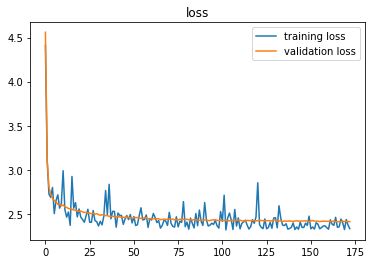

Plotting metrics...


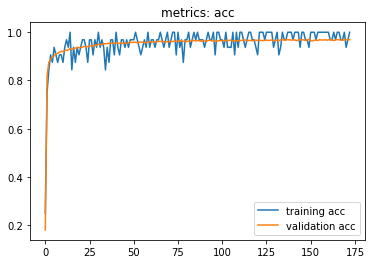

train {'acc': 0.9806727}
test {'acc': 0.9643}


In [27]:
if try_cls2:
    student.plt_loss()
    student.plt_metrics()
    train_metric = student.get_metrics(X_train, y_train)
    test_metric = student.get_metrics(X_test, y_test)
    print('train',train_metric)
    print('test',test_metric)

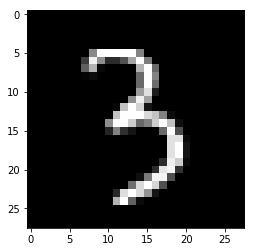

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[0.0492 0.0545 0.0422 0.5048 0.0184 0.0123 0.0442 0.045  0.1199 0.1095]]
[[0.0901 0.0932 0.0856 0.1959 0.065  0.0567 0.0869 0.0875 0.1213 0.1177]]


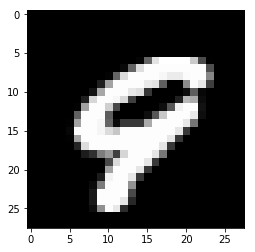

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
[[0.0075 0.0135 0.0049 0.0951 0.0888 0.0047 0.0163 0.0671 0.0169 0.6852]]
[[0.0565 0.0686 0.0488 0.1315 0.1285 0.0481 0.0731 0.1171 0.0739 0.254 ]]


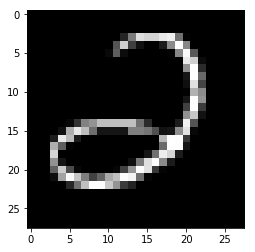

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[0.037  0.0575 0.3283 0.1764 0.0291 0.0383 0.0963 0.0548 0.0322 0.1503]]
[[0.0774 0.0897 0.1603 0.1304 0.0715 0.0784 0.1065 0.0883 0.0739 0.1236]]


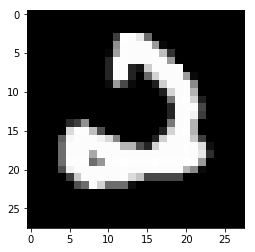

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
[[4.650e-02 6.000e-03 7.187e-01 4.450e-02 2.900e-03 2.000e-04 3.100e-03
  6.990e-02 1.000e-04 1.082e-01]]
[[0.1169 0.059  0.2914 0.1153 0.0464 0.0181 0.0472 0.134  0.0167 0.155 ]]


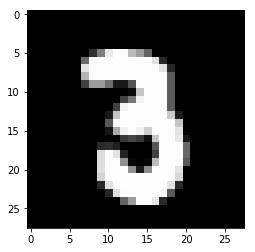

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[[0.0286 0.1688 0.0866 0.4158 0.0041 0.0006 0.0433 0.0561 0.1255 0.0707]]
[[0.0776 0.1403 0.1123 0.1894 0.0405 0.0216 0.0891 0.0972 0.1271 0.105 ]]


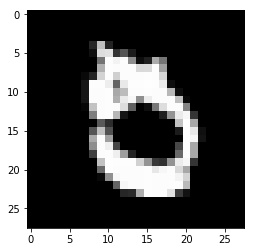

[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[[0.2039 0.0697 0.1812 0.1226 0.0236 0.0336 0.0542 0.0908 0.0404 0.18  ]]
[[0.1335 0.0934 0.1284 0.1127 0.0651 0.0732 0.0859 0.102  0.0778 0.1281]]


In [15]:
# plot and show sample
if try_cls2 and True:
    n_samples = 6
    round_show = 4
    n_data = X_test.shape[0]
    indices = np.random.choice(n_data,n_samples)
    for i in range(n_samples):
        sample = X_test[[indices[i]]]
        label = y_test[indices[i]]
        plt.imshow(sample.reshape((28,28)), cmap='gray')
        plt.show()
        pred = student.predict(sample)
        pred_t = student.predict_softened(sample, temperature=temperature)
        print(label)
        print(np.round(pred,round_show))
        print(np.round(pred_t,round_show))
#         print(np.round(pred_t2,round_show))
        #     student.predict()

In [16]:
# close_session(session)